In [1]:
#------------------Laden und Überprüfen der Daten
import pandas as pd

# Laden der Excel-Datei
file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)

# Anzeigen der ersten Zeilen des Datensatzes
data.head()

Unnamed: 0                tmsp  country  amount  success         PSP  \
0           0 2019-01-01 00:01:11  Germany      89        0     UK_Card   
1           1 2019-01-01 00:01:17  Germany      89        1     UK_Card   
2           2 2019-01-01 00:02:49  Germany     238        0     UK_Card   
3           3 2019-01-01 00:03:13  Germany     238        1     UK_Card   
4           4 2019-01-01 00:04:33  Austria     124        0  Simplecard   

   3D_secured    card  
0           0    Visa  
1           0    Visa  
2           1  Diners  
3           1  Diners  
4           0  Diners

In [2]:
# Entfernen der 'Unnamed: 0'-Spalte
data = data.drop(columns=['Unnamed: 0'])

# Anzeigen der ersten Zeilen nach dem Entfernen der Spalte
data.head()

tmsp  country  amount  success         PSP  3D_secured  \
0 2019-01-01 00:01:11  Germany      89        0     UK_Card           0   
1 2019-01-01 00:01:17  Germany      89        1     UK_Card           0   
2 2019-01-01 00:02:49  Germany     238        0     UK_Card           1   
3 2019-01-01 00:03:13  Germany     238        1     UK_Card           1   
4 2019-01-01 00:04:33  Austria     124        0  Simplecard           0   

     card  
0    Visa  
1    Visa  
2  Diners  
3  Diners  
4  Diners

In [3]:
# Überprüfen auf fehlende Werte
missing_values = data.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)

# Grundlegende Statistiken des Datensatzes
data.describe()

Fehlende Werte pro Spalte:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


tmsp        amount       success    3D_secured
count                          50410  50410.000000  50410.000000  50410.000000
mean   2019-01-29 16:28:52.923269120    202.395715      0.202896      0.238266
min              2019-01-01 00:01:11      6.000000      0.000000      0.000000
25%    2019-01-14 12:00:36.249999872    133.000000      0.000000      0.000000
50%       2019-01-30 15:20:07.500000    201.000000      0.000000      0.000000
75%       2019-02-13 01:09:50.500000    269.000000      0.000000      0.000000
max              2019-02-28 23:48:19    630.000000      1.000000      1.000000
std                              NaN     96.274730      0.402160      0.426027

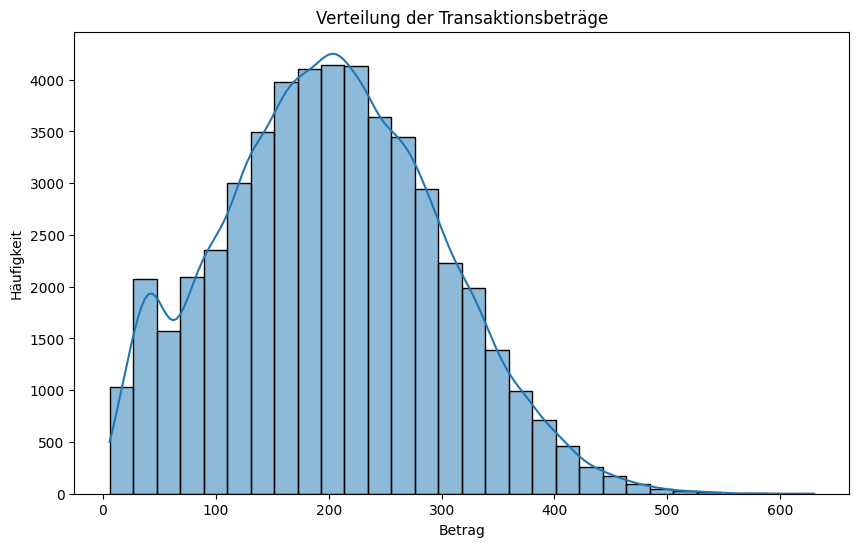

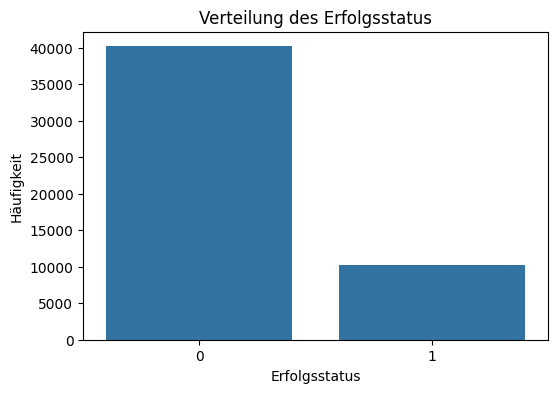

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Transaktionsbeträge
plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Verteilung der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung des Erfolgsstatus
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=data)
plt.title('Verteilung des Erfolgsstatus')
plt.xlabel('Erfolgsstatus')
plt.ylabel('Häufigkeit')
plt.show()

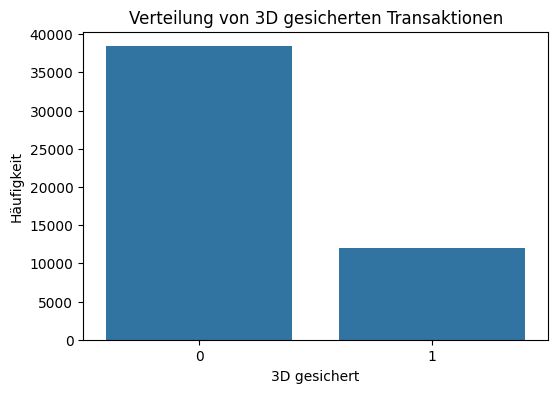

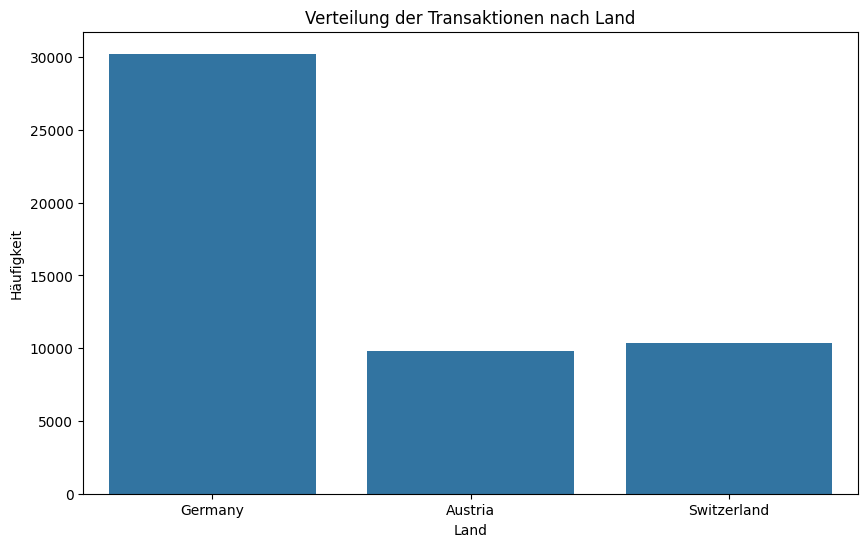

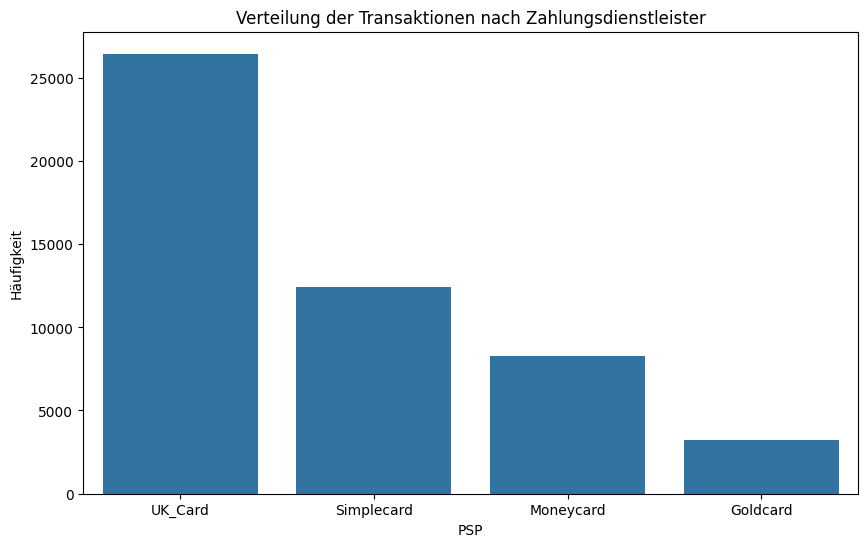

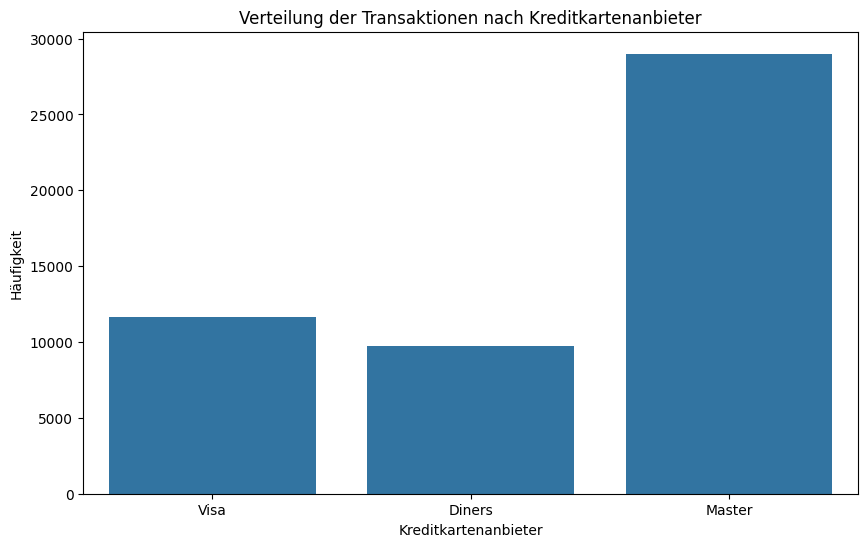

In [5]:
# Verteilung von 3D_secured
plt.figure(figsize=(6, 4))
sns.countplot(x='3D_secured', data=data)
plt.title('Verteilung von 3D gesicherten Transaktionen')
plt.xlabel('3D gesichert')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Land
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Verteilung der Transaktionen nach Land')
plt.xlabel('Land')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Zahlungsdienstleister (PSP)
plt.figure(figsize=(10, 6))
sns.countplot(x='PSP', data=data)
plt.title('Verteilung der Transaktionen nach Zahlungsdienstleister')
plt.xlabel('PSP')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Kreditkartenanbieter
plt.figure(figsize=(10, 6))
sns.countplot(x='card', data=data)
plt.title('Verteilung der Transaktionen nach Kreditkartenanbieter')
plt.xlabel('Kreditkartenanbieter')
plt.ylabel('Häufigkeit')
plt.show()

In [6]:
# Anzahl der ursprünglichen Datensätze
original_count = len(data)

# Konvertieren des Zeitstempels in das datetime-Format
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Sortieren der Daten nach 'country', 'amount' und 'tmsp'
data = data.sort_values(by=['country', 'amount', 'tmsp'])

# Berechnung der Zeitdifferenz zur vorherigen Transaktion in Sekunden
data['time_diff'] = data.groupby(['country', 'amount'])['tmsp'].diff().dt.total_seconds()

# Duplikate innerhalb einer Minute (60 Sekunden) entfernen
data = data[(data['time_diff'].isna()) | (data['time_diff'] > 60)]

# Anzahl der Datensätze nach dem Entfernen der Duplikate
new_count = len(data)

# Anzahl der entfernten Duplikate
removed_count = original_count - new_count

print(f"Ursprüngliche Anzahl der Datensätze: {original_count}")
print(f"Anzahl der Datensätze nach dem Entfernen der Duplikate: {new_count}")
print(f"Anzahl der entfernten Duplikate: {removed_count}")

# Entfernen der 'time_diff'-Spalte, da sie nicht mehr benötigt wird
data = data.drop(columns=['time_diff'])

# Anzeigen der ersten Zeilen nach dem Entfernen von Duplikaten
data.head()

Ursprüngliche Anzahl der Datensätze: 50410
Anzahl der Datensätze nach dem Entfernen der Duplikate: 27337
Anzahl der entfernten Duplikate: 23073


tmsp  country  amount  success         PSP  3D_secured  \
9238  2019-01-10 03:49:12  Austria       6        0   Moneycard           0   
22742 2019-01-27 14:01:11  Austria       6        1  Simplecard           0   
33737 2019-02-08 05:02:33  Austria       6        0     UK_Card           0   
40539 2019-02-16 08:24:40  Austria       6        1     UK_Card           1   
21179 2019-01-25 04:18:26  Austria       7        0   Moneycard           0   

         card  
9238   Diners  
22742  Master  
33737  Diners  
40539  Master  
21179  Master

Fehlende Werte pro Spalte:
 tmsp          0
country       0
amount        0
success       0
PSP           0
3D_secured    0
card          0
dtype: int64


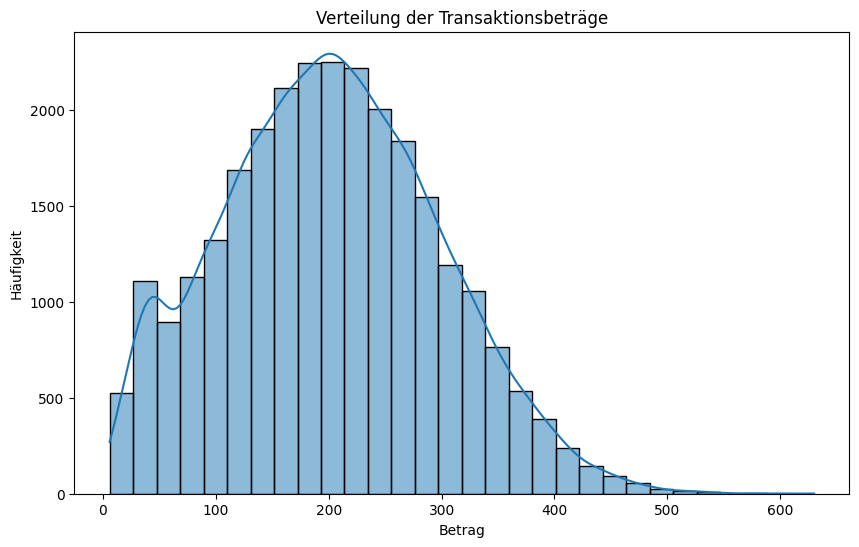

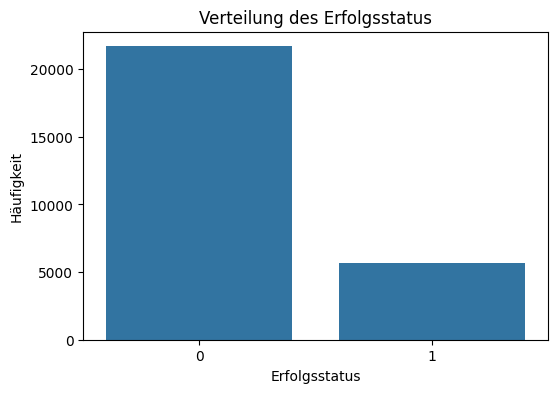

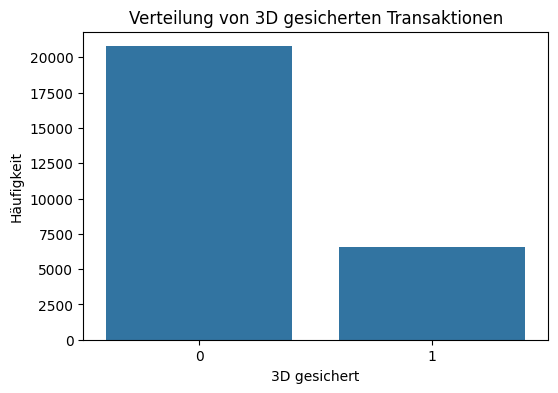

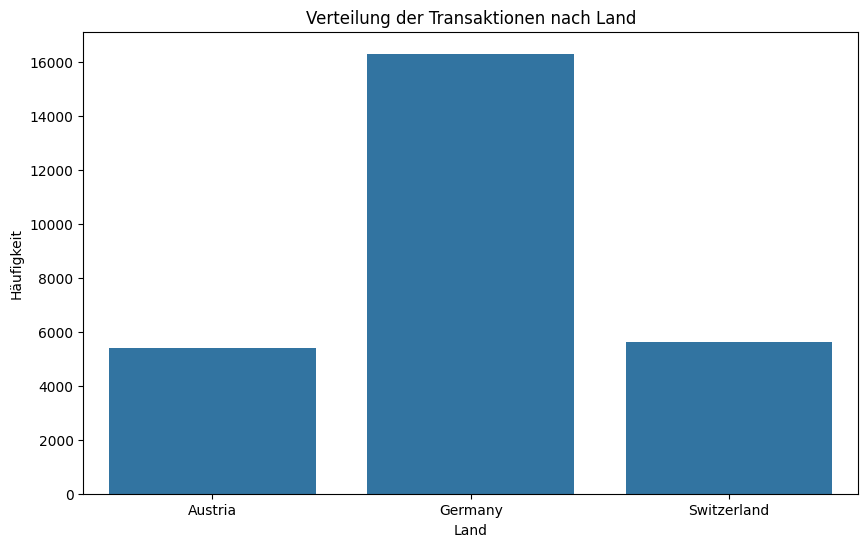

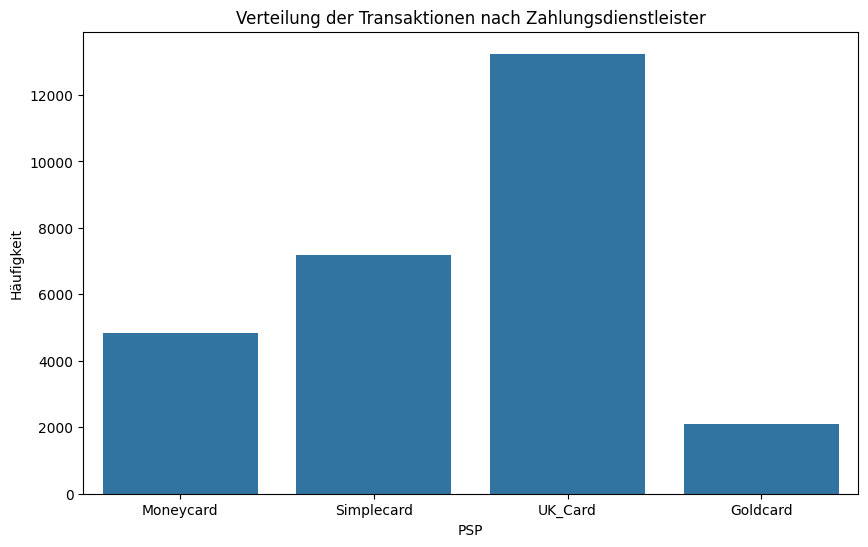

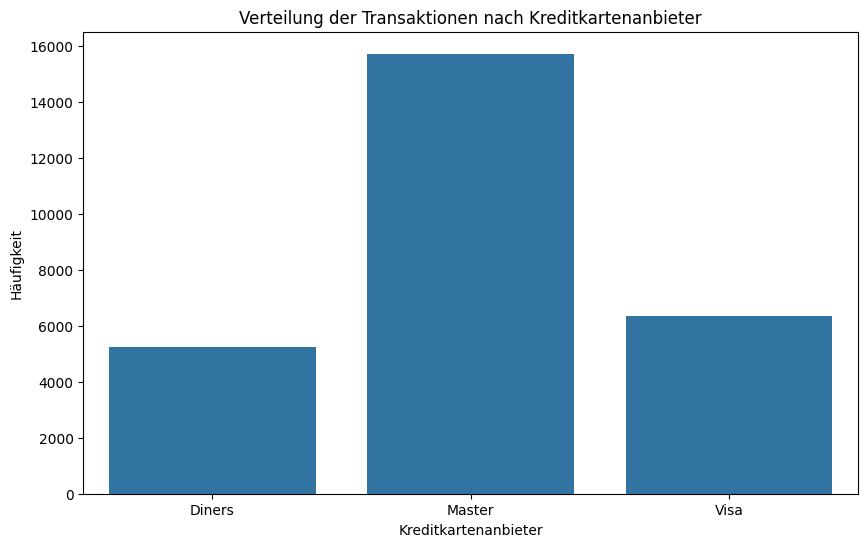

In [7]:
# Überprüfen auf fehlende Werte
missing_values = data.isnull().sum()
print("Fehlende Werte pro Spalte:\n", missing_values)

# Grundlegende Statistiken des Datensatzes
data.describe()

# Verteilung der Transaktionsbeträge
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['amount'], bins=30, kde=True)
plt.title('Verteilung der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung des Erfolgsstatus
plt.figure(figsize=(6, 4))
sns.countplot(x='success', data=data)
plt.title('Verteilung des Erfolgsstatus')
plt.xlabel('Erfolgsstatus')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung von 3D_secured
plt.figure(figsize=(6, 4))
sns.countplot(x='3D_secured', data=data)
plt.title('Verteilung von 3D gesicherten Transaktionen')
plt.xlabel('3D gesichert')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Land
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Verteilung der Transaktionen nach Land')
plt.xlabel('Land')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Zahlungsdienstleister (PSP)
plt.figure(figsize=(10, 6))
sns.countplot(x='PSP', data=data)
plt.title('Verteilung der Transaktionen nach Zahlungsdienstleister')
plt.xlabel('PSP')
plt.ylabel('Häufigkeit')
plt.show()

# Verteilung nach Kreditkartenanbieter
plt.figure(figsize=(10, 6))
sns.countplot(x='card', data=data)
plt.title('Verteilung der Transaktionen nach Kreditkartenanbieter')
plt.xlabel('Kreditkartenanbieter')
plt.ylabel('Häufigkeit')
plt.show()

In [8]:
# Überprüfen der Datentypen
print(data.dtypes)

# Sicherstellen, dass 'amount' numerisch ist
data['amount'] = pd.to_numeric(data['amount'], errors='coerce')

# Sicherstellen, dass 'tmsp' ein Datumstyp ist
data['tmsp'] = pd.to_datetime(data['tmsp'], errors='coerce')

tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


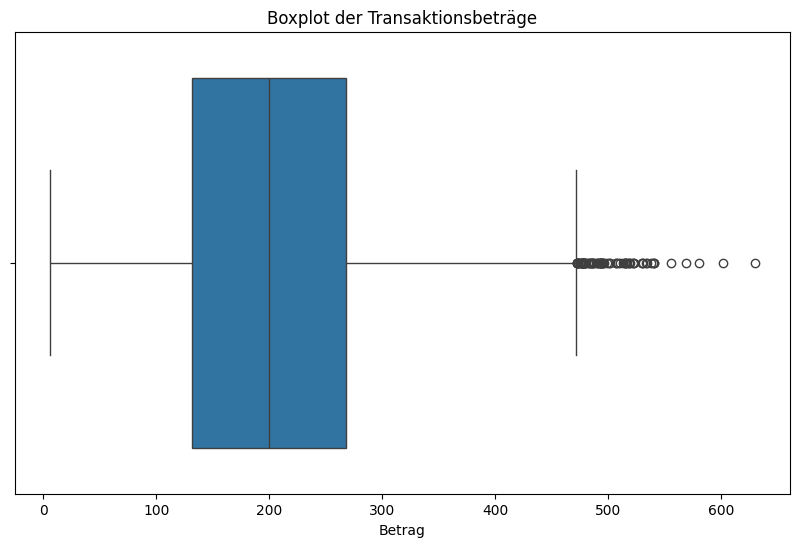

In [9]:
# Boxplot zur Identifikation von Ausreißern bei den Transaktionsbeträgen
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['amount'])
plt.title('Boxplot der Transaktionsbeträge')
plt.xlabel('Betrag')
plt.show()

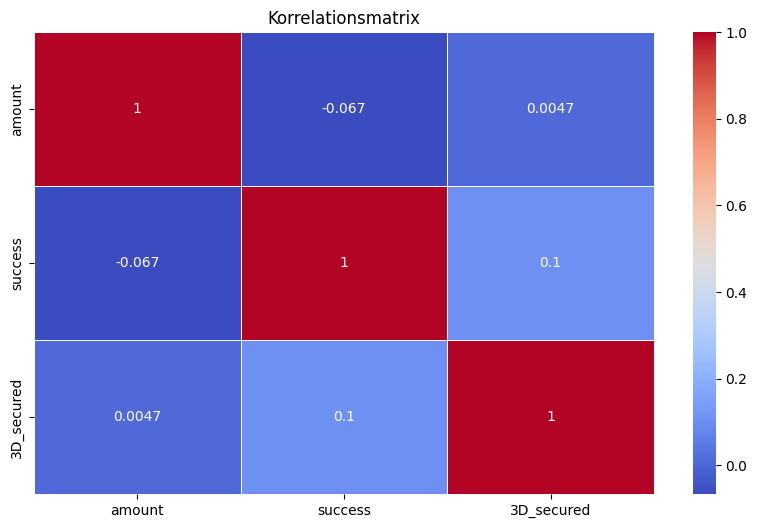

In [10]:
# Auswahl der numerischen Spalten
numeric_columns = data.select_dtypes(include=['number']).columns

# Korrelationen zwischen numerischen Variablen berechnen
correlation_matrix = data[numeric_columns].corr()

# Heatmap zur Visualisierung der Korrelationen
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korrelationsmatrix')
plt.show()

In [11]:
# Einzigartige Werte in den kategorischen Spalten anzeigen
print("Einzigartige Werte in 'country':", data['country'].unique())
print("Einzigartige Werte in 'PSP':", data['PSP'].unique())
print("Einzigartige Werte in 'card':", data['card'].unique())

Einzigartige Werte in 'country': ['Austria' 'Germany' 'Switzerland']
Einzigartige Werte in 'PSP': ['Moneycard' 'Simplecard' 'UK_Card' 'Goldcard']
Einzigartige Werte in 'card': ['Diners' 'Master' 'Visa']


In [12]:
#Datenaufbereitung für das Modell
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Auswahl der Merkmale (Features) und Zielvariable (Target)
X = data.drop(columns=['success', 'tmsp'])
y = data['success']

# Kategorische Variablen in Dummy-Variablen umwandeln
X = pd.get_dummies(X, drop_first=True)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisieren der numerischen Merkmale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Erstellen eines Baseline-Modells (Logistische Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

# Erstellen und Trainieren des Modells
baseline_model = LogisticRegression(random_state=42)
baseline_model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = baseline_model.predict(X_test)
y_pred_prob = baseline_model.predict_proba(X_test)[:, 1]

Genauigkeit: 0.7990
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4338
           1       0.64      0.06      0.11      1130

    accuracy                           0.80      5468
   macro avg       0.72      0.53      0.50      5468
weighted avg       0.77      0.80      0.73      5468



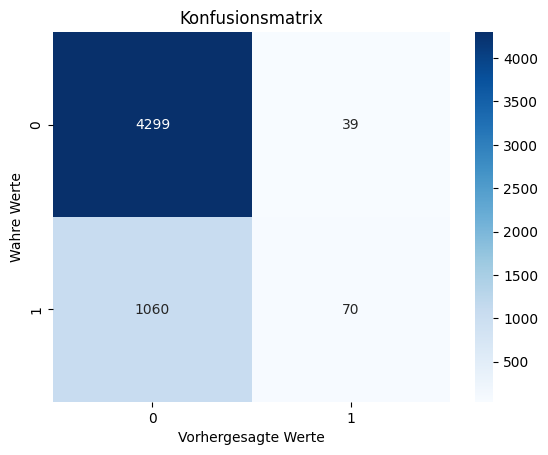

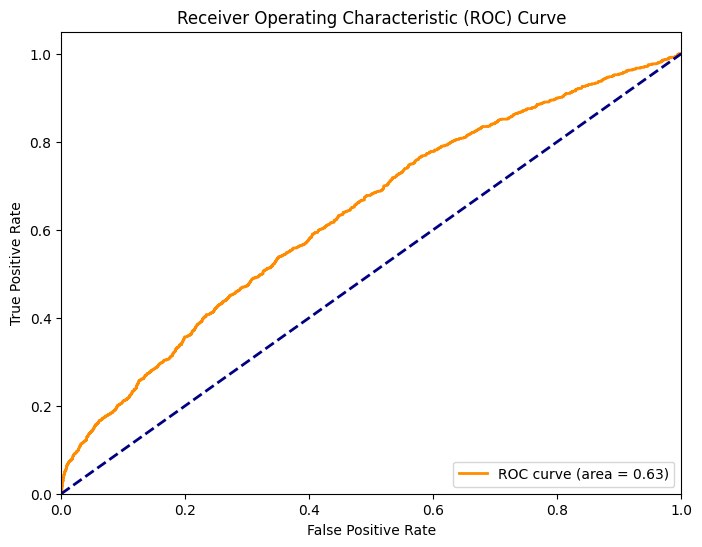

In [14]:
#Evaluierung des Baseline-Modells
# Berechnung der Metriken
accuracy = accuracy_score(y_test, y_pred)
print(f"Genauigkeit: {accuracy:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
#Feature-Engineering
# Erstellen neuer Features
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Auswahl der Merkmale (Features) und Zielvariable (Target)
X = data.drop(columns=['success', 'tmsp'])
y = data['success']

# Kategorische Variablen in Dummy-Variablen umwandeln
X = pd.get_dummies(X, drop_first=True)

# Aufteilen der Daten in Trainings- und Testsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisieren der numerischen Merkmale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Genauigkeit: 0.7988
Präzision: 0.6389
Recall: 0.0611
F1-Score: 0.1115
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      4338
           1       0.64      0.06      0.11      1130

    accuracy                           0.80      5468
   macro avg       0.72      0.53      0.50      5468
weighted avg       0.77      0.80      0.73      5468



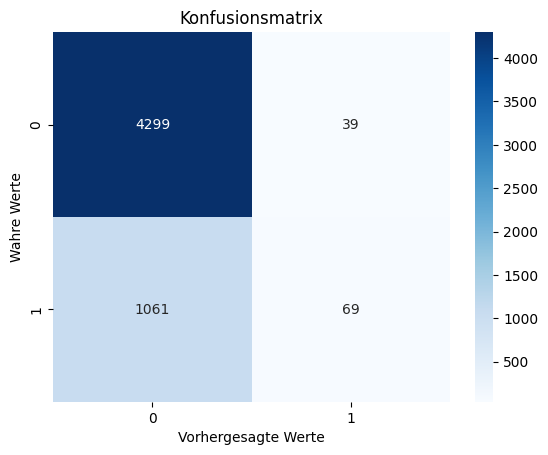

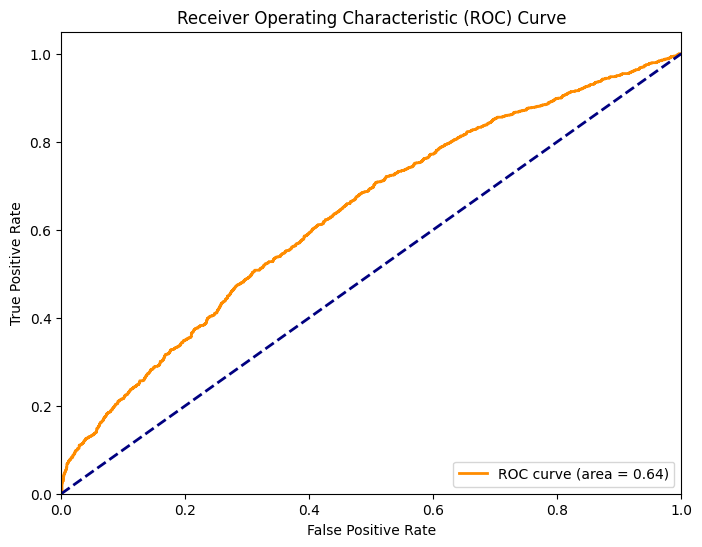

In [16]:
# Erstellung und Training des Modells
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score, recall_score, precision_score

# Erstellen und Trainieren des Modells
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Vorhersagen auf dem Testset
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Berechnung der Metriken
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Genauigkeit: {accuracy:.4f}")
print(f"Präzision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred))

# Konfusionsmatrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Genauigkeit: 0.6214
Präzision: 0.3042
Recall: 0.6460
F1-Score: 0.4136


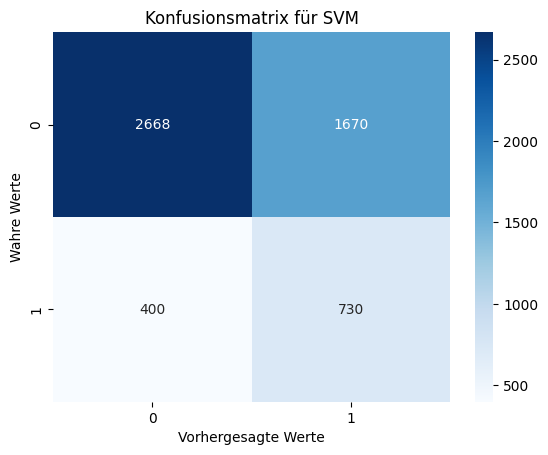

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Erstellung des Modells
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_smote_scaled, y_train_smote)

# Vorhersage auf dem Testset
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Berechnung der Metriken
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Genauigkeit: {accuracy_svm:.4f}")
print(f"Präzision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

# Konfusionsmatrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für SVM')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

Genauigkeit: 0.7248
Präzision: 0.3312
Recall: 0.3257
F1-Score: 0.3284
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      4338
           1       0.33      0.33      0.33      1130

    accuracy                           0.72      5468
   macro avg       0.58      0.58      0.58      5468
weighted avg       0.72      0.72      0.72      5468



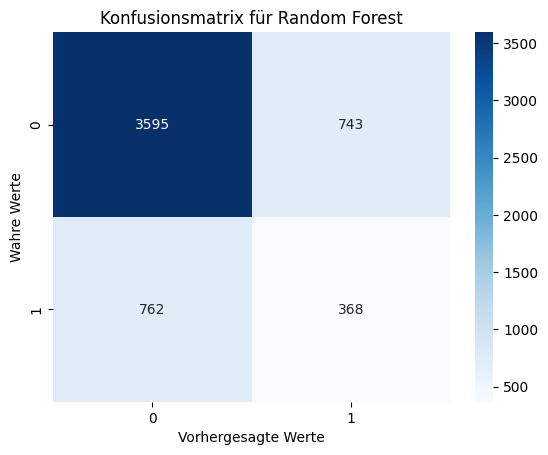

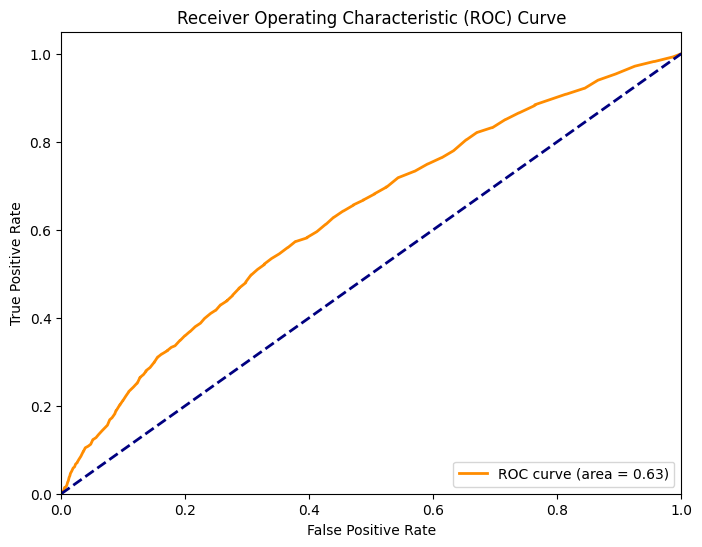

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Erstellung und Training des Random Forest Modells
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote_scaled, y_train_smote)

# Vorhersage auf dem Testset
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

# Berechnung der Metriken
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, zero_division=1)
recall_rf = recall_score(y_test, y_pred_rf, zero_division=1)
f1_rf = f1_score(y_test, y_pred_rf, zero_division=1)

print(f"Genauigkeit: {accuracy_rf:.4f}")
print(f"Präzision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_rf))

# Konfusionsmatrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für Random Forest')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Genauigkeit: 0.7303
Präzision: 0.3263
Recall: 0.3089
F1-Score: 0.3173
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83      8036
           1       0.33      0.31      0.32      2046

    accuracy                           0.73     10082
   macro avg       0.58      0.57      0.57     10082
weighted avg       0.72      0.73      0.73     10082



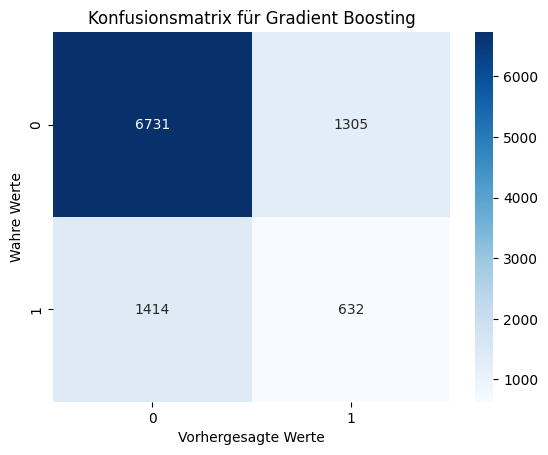

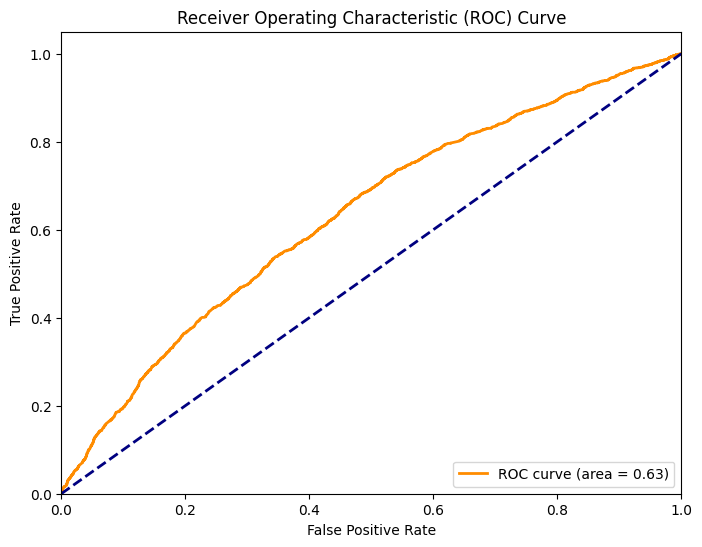

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Laden der Excel-Datei
file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)

# Entfernen der 'Unnamed: 0'-Spalte
data = data.drop(columns=['Unnamed: 0'])

# Konvertieren des Zeitstempels in das datetime-Format
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Feature Engineering
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Auswahl der Merkmale (Features) und Zielvariable (Target)
X = data.drop(columns=['success', 'tmsp'])
y = data['success']

# Kategorische Variablen in Dummy-Variablen umwandeln
X = pd.get_dummies(X, drop_first=True)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Modell
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_smote_scaled, y_train_smote)

# Vorhersage auf dem Testset
y_pred_gb = gb_model.predict(X_test_scaled)
y_pred_prob_gb = gb_model.predict_proba(X_test_scaled)[:, 1]

# Berechnung der Metriken
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, zero_division=1)
recall_gb = recall_score(y_test, y_pred_gb, zero_division=1)
f1_gb = f1_score(y_test, y_pred_gb, zero_division=1)

print(f"Genauigkeit: {accuracy_gb:.4f}")
print(f"Präzision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_gb))

# Konfusionsmatrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für Gradient Boosting')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
roc_auc = roc_auc_score(y_test, y_pred_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Genauigkeit: 0.7272
Präzision: 0.3206
Recall: 0.3074
F1-Score: 0.3139
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      8036
           1       0.32      0.31      0.31      2046

    accuracy                           0.73     10082
   macro avg       0.57      0.57      0.57     10082
weighted avg       0.72      0.73      0.73     10082



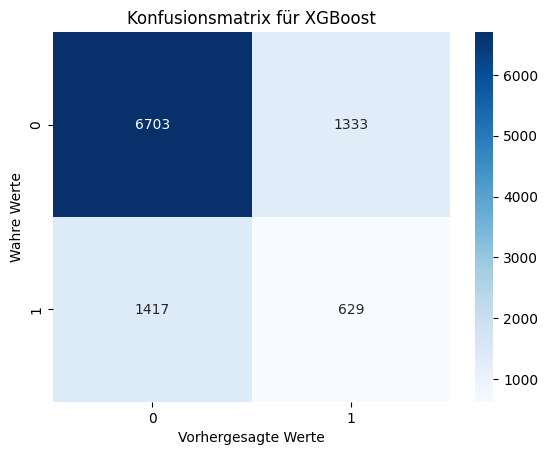

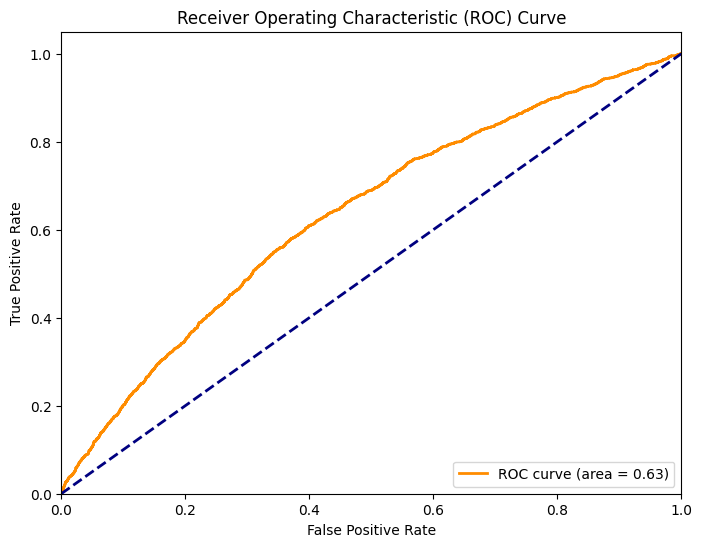

In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# XGBoost Modell
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train_smote_scaled, y_train_smote)

# Vorhersage auf dem Testset
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Berechnung der Metriken
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, zero_division=1)
recall_xgb = recall_score(y_test, y_pred_xgb, zero_division=1)
f1_xgb = f1_score(y_test, y_pred_xgb, zero_division=1)

print(f"Genauigkeit: {accuracy_xgb:.4f}")
print(f"Präzision: {precision_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_xgb))

# Konfusionsmatrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für XGBoost')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc = roc_auc_score(y_test, y_pred_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

[LightGBM] [Info] Number of positive: 32146, number of negative: 32146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 64292, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Genauigkeit: 0.7411
Präzision: 0.3428
Recall: 0.3006
F1-Score: 0.3203
Klassifikationsbericht:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      8036
           1       0.34      0.30      0.32      2046

    accuracy                           0.74     10082
   macro avg       0.59      0.58      0.58     10082
weighted avg       0.73      0.74      0.73     10082



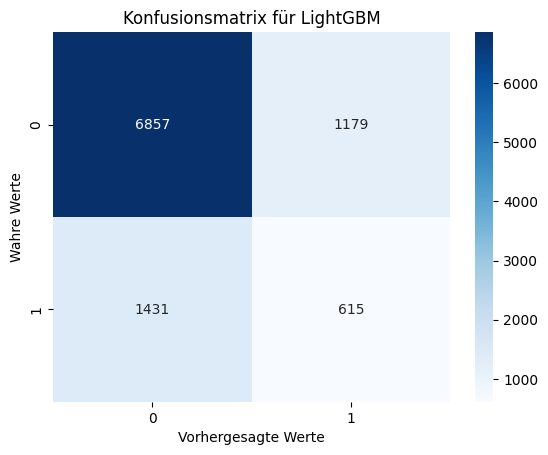

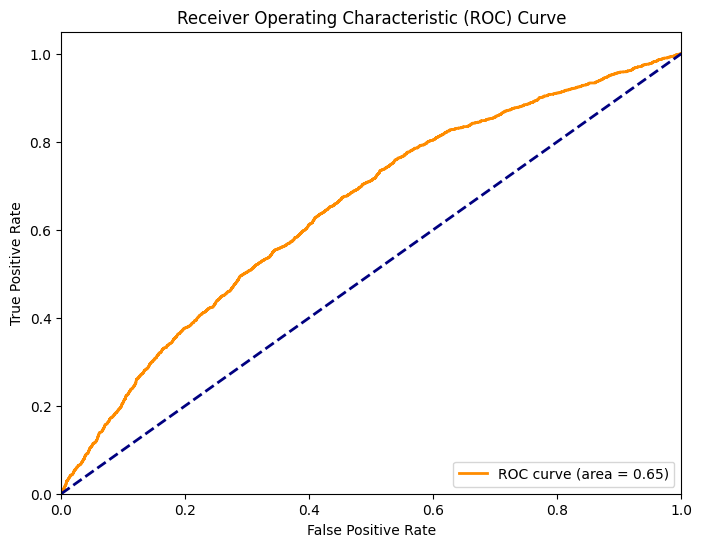

In [21]:
import lightgbm as lgb

# LightGBM Modell
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote_scaled, y_train_smote)

# Vorhersage auf dem Testset
y_pred_lgb = lgb_model.predict(X_test_scaled)
y_pred_prob_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Berechnung der Metriken
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb, zero_division=1)
recall_lgb = recall_score(y_test, y_pred_lgb, zero_division=1)
f1_lgb = f1_score(y_test, y_pred_lgb, zero_division=1)

print(f"Genauigkeit: {accuracy_lgb:.4f}")
print(f"Präzision: {precision_lgb:.4f}")
print(f"Recall: {recall_lgb:.4f}")
print(f"F1-Score: {f1_lgb:.4f}")

print("Klassifikationsbericht:")
print(classification_report(y_test, y_pred_lgb))

# Konfusionsmatrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für LightGBM')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# ROC-Kurve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_lgb)
roc_auc = roc_auc_score(y_test, y_pred_prob_lgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   5.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   9.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  10.2s
[CV] END m

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  15.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  10.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_esti

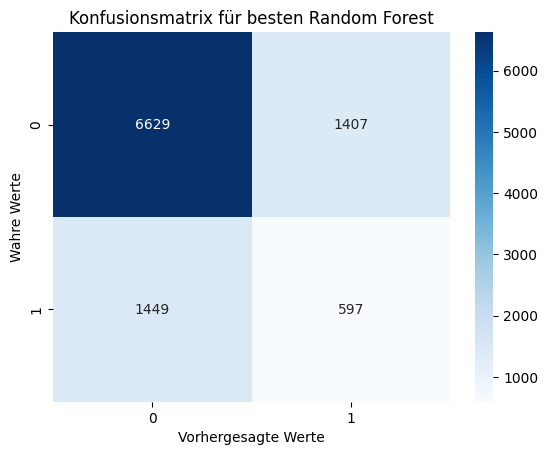

In [22]:
# Definieren des erweiterten Hyperparameter-Bereichs
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV zur Hyperparameter-Suche
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_smote_scaled, y_train_smote)

# Beste Hyperparameter
best_params_rf = grid_search_rf.best_params_
print(f"Beste Hyperparameter für Random Forest: {best_params_rf}")

# Modell mit besten Hyperparametern trainieren
best_rf_model = grid_search_rf.best_estimator_

# Vorhersage auf dem Testset
y_pred_best_rf = best_rf_model.predict(X_test_scaled)
y_pred_prob_best_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Bewertung der Modellleistung
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, zero_division=1)
recall_best_rf = recall_score(y_test, y_pred_best_rf, zero_division=1)
f1_best_rf = f1_score(y_test, y_pred_best_rf, zero_division=1)

print("Beste Random Forest Ergebnisse:")
print(f"Genauigkeit: {accuracy_best_rf:.4f}")
print(f"Präzision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")

# Konfusionsmatrix
conf_matrix_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für besten Random Forest')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 25717, number of negative: 25716
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 51433, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500010 -> initscore=0.000039
[LightGBM] [Info] Start training from score 0.000039
[LightGBM] [Info] Number of positive: 25717, number of negative: 25717
[LightGBM] [Info] Number of positive: 25717, number of negative: 25717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Inf

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=50, num_leaves=50; total time=   4.2s
[LightGBM] [Info] Number of positive: 25717, number of negative: 25717
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 51434, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=50, num_leaves=50; total time=   4.4s
[LightGBM] [Info] Number of positive: 25717, number of negative: 25716
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=50, num_leaves=50; total time=   4.4s
[CV] END boosting_type=gbdt, learning_rate=0.01, n_estimators=50, num_leaves=50; total time=   4.4s
[LightGBM] [Info] Auto-choo

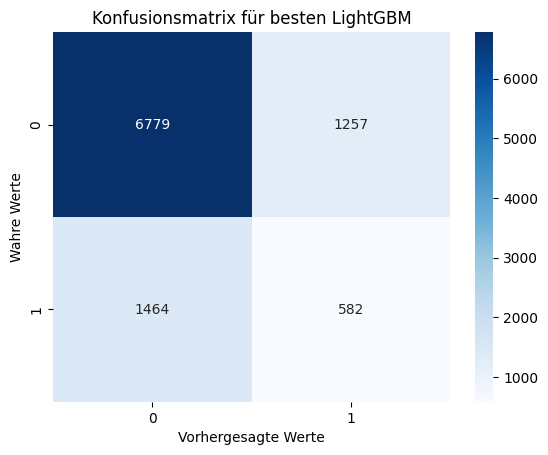

In [23]:
# Definieren des erweiterten Hyperparameter-Bereichs
param_grid_lgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'boosting_type': ['gbdt', 'dart']
}

# GridSearchCV zur Hyperparameter-Suche
grid_search_lgb = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=42), param_grid=param_grid_lgb, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search_lgb.fit(X_train_smote_scaled, y_train_smote)

# Beste Hyperparameter
best_params_lgb = grid_search_lgb.best_params_
print(f"Beste Hyperparameter für LightGBM: {best_params_lgb}")

# Modell mit besten Hyperparametern trainieren
best_lgb_model = grid_search_lgb.best_estimator_

# Vorhersage auf dem Testset
y_pred_best_lgb = best_lgb_model.predict(X_test_scaled)
y_pred_prob_best_lgb = best_lgb_model.predict_proba(X_test_scaled)[:, 1]

# Bewertung der Modellleistung
accuracy_best_lgb = accuracy_score(y_test, y_pred_best_lgb)
precision_best_lgb = precision_score(y_test, y_pred_best_lgb, zero_division=1)
recall_best_lgb = recall_score(y_test, y_pred_best_lgb, zero_division=1)
f1_best_lgb = f1_score(y_test, y_pred_best_lgb, zero_division=1)

print("Beste LightGBM Ergebnisse:")
print(f"Genauigkeit: {accuracy_best_lgb:.4f}")
print(f"Präzision: {precision_best_lgb:.4f}")
print(f"Recall: {recall_best_lgb:.4f}")
print(f"F1-Score: {f1_best_lgb:.4f}")

# Konfusionsmatrix
conf_matrix_best_lgb = confusion_matrix(y_test, y_pred_best_lgb)
sns.heatmap(conf_matrix_best_lgb, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für besten LightGBM')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

In [24]:
# Definition der Gebührenstruktur
fee_structure = {
    'Moneycard': {'success': 5, 'failure': 2},
    'Goldcard': {'success': 10, 'failure': 5},
    'UK_Card': {'success': 3, 'failure': 1},
    'Simplecard': {'success': 1, 'failure': 0.5}
}

# Berechnung der tatsächlichen Gebühren
data['fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Vorbereitung der Daten wie im Training für Vorhersagen
X_data = data.drop(columns=['success', 'tmsp', 'fee'])
X_data = pd.get_dummies(X_data, drop_first=True)
X_data = X_data.reindex(columns=X_train.columns, fill_value=0)
X_data_scaled = scaler.transform(X_data)

# Berechnung der Gebühren basierend auf den Vorhersagen des besten Modells (LightGBM)
data['predicted_success'] = best_lgb_model.predict(X_data_scaled)
data['predicted_fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['predicted_success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Summierung der tatsächlichen und vorhergesagten Gebühren
actual_total_fee = data['fee'].sum()
predicted_total_fee = data['predicted_fee'].sum()

print(f"Tatsächliche Gesamtkosten: {actual_total_fee}")
print(f"Vorhergesagte Gesamtkosten: {predicted_total_fee}")

Tatsächliche Gesamtkosten: 88544.0
Vorhergesagte Gesamtkosten: 92119.0


[LightGBM] [Info] Number of positive: 32146, number of negative: 32146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 64292, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Optimaler Schwellenwert: 0.23
Genauigkeit: 0.5099
Präzision: 0.2616
Recall: 0.7761
F1-Score: 0.3913


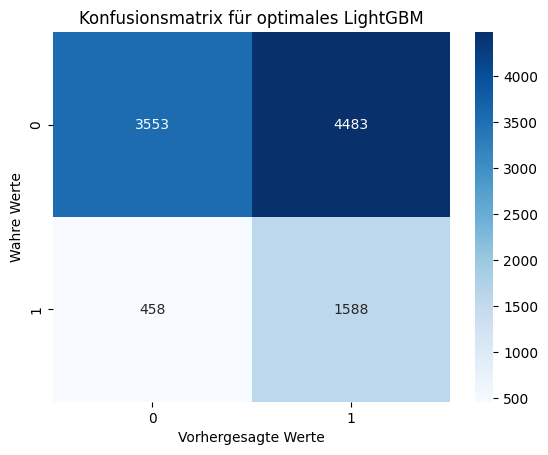

Tatsächliche Gesamtkosten: 88544.0
Vorhergesagte Gesamtkosten: 134039.5
Verteilung der tatsächlichen Erfolge: 
success
0    40182
1    10228
Name: count, dtype: int64
Verteilung der vorhergesagten Erfolge: 
predicted_success
1    30382
0    20028
Name: count, dtype: int64


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Laden der Excel-Datei
file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)
data = data.drop(columns=['Unnamed: 0'])

# Konvertieren des Zeitstempels in das datetime-Format
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Feature Engineering
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Auswahl der Merkmale (Features) und Zielvariable (Target)
X = data.drop(columns=['success', 'tmsp'])
y = data['success']
X = pd.get_dummies(X, drop_first=True)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# LightGBM Modell trainieren
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote_scaled, y_train_smote)

# Berechnung der Vorhersagewahrscheinlichkeiten für das Testset
y_pred_prob = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Anpassung des Schwellenwerts
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_test, (y_pred_prob >= t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimaler Schwellenwert: {optimal_threshold}")

# Vorhersage mit optimalem Schwellenwert
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Bewertung der Modellleistung
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=1)
recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=1)
f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=1)

print(f"Genauigkeit: {accuracy_optimal:.4f}")
print(f"Präzision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")

# Konfusionsmatrix
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für optimales LightGBM')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# Definition der Gebührenstruktur
fee_structure = {
    'Moneycard': {'success': 5, 'failure': 2},
    'Goldcard': {'success': 10, 'failure': 5},
    'UK_Card': {'success': 3, 'failure': 1},
    'Simplecard': {'success': 1, 'failure': 0.5}
}

# Berechnung der tatsächlichen Gebühren
data['fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Vorbereitung der Daten wie im Training für Vorhersagen
X_data = data.drop(columns=['success', 'tmsp', 'fee'])
X_data = pd.get_dummies(X_data, drop_first=True)
X_data = X_data.reindex(columns=X_train.columns, fill_value=0)
X_data_scaled = scaler.transform(X_data)

# Berechnung der Vorhersagewahrscheinlichkeiten
data['predicted_prob'] = lgb_model.predict_proba(X_data_scaled)[:, 1]

# Berechnung der Gebühren basierend auf den Vorhersagen mit optimalem Schwellenwert
data['predicted_success'] = (data['predicted_prob'] >= optimal_threshold).astype(int)
data['predicted_fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['predicted_success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Summierung der tatsächlichen und vorhergesagten Gebühren
actual_total_fee = data['fee'].sum()
predicted_total_fee = data['predicted_fee'].sum()

print(f"Tatsächliche Gesamtkosten: {actual_total_fee}")
print(f"Vorhergesagte Gesamtkosten: {predicted_total_fee}")

# Analyse der Verteilung der Transaktionen nach Erfolg und Misserfolg
success_count = data['success'].value_counts()
predicted_success_count = data['predicted_success'].value_counts()

print(f"Verteilung der tatsächlichen Erfolge: \n{success_count}")
print(f"Verteilung der vorhergesagten Erfolge: \n{predicted_success_count}")

[LightGBM] [Info] Number of positive: 32146, number of negative: 32146
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 312
[LightGBM] [Info] Number of data points in the train set: 64292, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Optimaler Schwellenwert: 0.23
Genauigkeit: 0.5099
Präzision: 0.2616
Recall: 0.7761
F1-Score: 0.3913


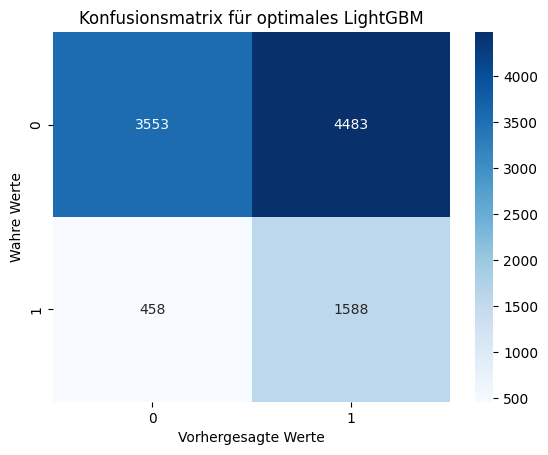

Tatsächliche Gesamtkosten: 88544.0
Vorhergesagte Gesamtkosten: 134039.5
Verteilung der tatsächlichen Erfolge: 
success
0    40182
1    10228
Name: count, dtype: int64
Verteilung der vorhergesagten Erfolge: 
predicted_success
1    30382
0    20028
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# Laden der Excel-Datei
file_path = 'PSP_Jan_Feb_2019.xlsx'
data = pd.read_excel(file_path)
data = data.drop(columns=['Unnamed: 0'])

# Konvertieren des Zeitstempels in das datetime-Format
data['tmsp'] = pd.to_datetime(data['tmsp'])

# Feature Engineering
data['hour'] = data['tmsp'].dt.hour
data['day_of_week'] = data['tmsp'].dt.dayofweek

# Auswahl der Merkmale (Features) und Zielvariable (Target)
X = data.drop(columns=['success', 'tmsp'])
y = data['success']
X = pd.get_dummies(X, drop_first=True)

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE anwenden
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardisieren der numerischen Merkmale nach SMOTE
scaler = StandardScaler()
X_train_smote_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# LightGBM Modell trainieren
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote_scaled, y_train_smote)

# Berechnung der Vorhersagewahrscheinlichkeiten für das Testset
y_pred_prob = lgb_model.predict_proba(X_test_scaled)[:, 1]

# Anpassung des Schwellenwerts
thresholds = np.arange(0.0, 1.0, 0.01)
f1_scores = [f1_score(y_test, (y_pred_prob >= t).astype(int)) for t in thresholds]
optimal_threshold = thresholds[np.argmax(f1_scores)]
print(f"Optimaler Schwellenwert: {optimal_threshold}")

# Vorhersage mit optimalem Schwellenwert
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)

# Bewertung der Modellleistung
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal, zero_division=1)
recall_optimal = recall_score(y_test, y_pred_optimal, zero_division=1)
f1_optimal = f1_score(y_test, y_pred_optimal, zero_division=1)

print(f"Genauigkeit: {accuracy_optimal:.4f}")
print(f"Präzision: {precision_optimal:.4f}")
print(f"Recall: {recall_optimal:.4f}")
print(f"F1-Score: {f1_optimal:.4f}")

# Konfusionsmatrix
conf_matrix_optimal = confusion_matrix(y_test, y_pred_optimal)
sns.heatmap(conf_matrix_optimal, annot=True, fmt='d', cmap='Blues')
plt.title('Konfusionsmatrix für optimales LightGBM')
plt.xlabel('Vorhergesagte Werte')
plt.ylabel('Wahre Werte')
plt.show()

# Definition der Gebührenstruktur
fee_structure = {
    'Moneycard': {'success': 5, 'failure': 2},
    'Goldcard': {'success': 10, 'failure': 5},
    'UK_Card': {'success': 3, 'failure': 1},
    'Simplecard': {'success': 1, 'failure': 0.5}
}

# Berechnung der tatsächlichen Gebühren
data['fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Vorbereitung der Daten wie im Training für Vorhersagen
X_data = data.drop(columns=['success', 'tmsp', 'fee'])
X_data = pd.get_dummies(X_data, drop_first=True)
X_data = X_data.reindex(columns=X_train.columns, fill_value=0)
X_data_scaled = scaler.transform(X_data)

# Berechnung der Vorhersagewahrscheinlichkeiten
data['predicted_prob'] = lgb_model.predict_proba(X_data_scaled)[:, 1]

# Berechnung der Gebühren basierend auf den Vorhersagen mit optimalem Schwellenwert
data['predicted_success'] = (data['predicted_prob'] >= optimal_threshold).astype(int)
data['predicted_fee'] = data.apply(lambda row: fee_structure[row['PSP']]['success'] if row['predicted_success'] == 1 else fee_structure[row['PSP']]['failure'], axis=1)

# Summierung der tatsächlichen und vorhergesagten Gebühren
actual_total_fee = data['fee'].sum()
predicted_total_fee = data['predicted_fee'].sum()

print(f"Tatsächliche Gesamtkosten: {actual_total_fee}")
print(f"Vorhergesagte Gesamtkosten: {predicted_total_fee}")

# Analyse der Verteilung der Transaktionen nach Erfolg und Misserfolg
success_count = data['success'].value_counts()
predicted_success_count = data['predicted_success'].value_counts()

print(f"Verteilung der tatsächlichen Erfolge: \n{success_count}")
print(f"Verteilung der vorhergesagten Erfolge: \n{predicted_success_count}")

In [29]:
import pandas as pd

df = pd.read_excel("PSP_Jan_Feb_2019.xlsx")

# 2. Duplicate Removal innerhalb einer Minute
df['minute'] = pd.to_datetime(df['tmsp']).dt.minute
df = df.groupby(['country', 'amount', 'minute']).first().reset_index()

print(df.head())

   country  amount  minute  Unnamed: 0                tmsp  success  \
0  Austria       6       1       22742 2019-01-27 14:01:11        1   
1  Austria       6       2       33737 2019-02-08 05:02:33        0   
2  Austria       6      24       40539 2019-02-16 08:24:40        1   
3  Austria       6      49        9238 2019-01-10 03:49:12        0   
4  Austria       7       9       31712 2019-02-06 04:09:05        0   

          PSP  3D_secured    card  
0  Simplecard           0  Master  
1     UK_Card           0  Diners  
2     UK_Card           1  Master  
3   Moneycard           0  Diners  
4     UK_Card           0  Diners  


In [30]:
import pandas as pd

# 3. Feature Engineering
df['day_of_week'] = pd.to_datetime(df['tmsp']).dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = pd.to_datetime(df['tmsp']).dt.hour
df['amount_category'] = pd.cut(df['amount'], bins=[0, 50, 100, 200, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
# ... weitere Features

print(df.head())

   country  amount  minute  Unnamed: 0                tmsp  success  \
0  Austria       6       1       22742 2019-01-27 14:01:11        1   
1  Austria       6       2       33737 2019-02-08 05:02:33        0   
2  Austria       6      24       40539 2019-02-16 08:24:40        1   
3  Austria       6      49        9238 2019-01-10 03:49:12        0   
4  Austria       7       9       31712 2019-02-06 04:09:05        0   

          PSP  3D_secured    card  day_of_week  hour amount_category  
0  Simplecard           0  Master            6    14             Low  
1     UK_Card           0  Diners            4     5             Low  
2     UK_Card           1  Master            5     8             Low  
3   Moneycard           0  Diners            3     3             Low  
4     UK_Card           0  Diners            2     4             Low  


In [31]:
import pandas as pd

# ... (Code für Datenladen und Feature Engineering)

# 4. Zielvariable definieren
y = df['success'] 

print(y.head())

0    1
1    0
2    1
3    0
4    0
Name: success, dtype: int64


In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
# 3. Features auswählen
X = df[['country', 'amount', 'PSP', '3D_secured', 'card']]

# 4. Label Encoding für nicht-numerische Features
label_encoder = LabelEncoder()

X['country'] = label_encoder.fit_transform(X['country'])
X['PSP'] = label_encoder.fit_transform(X['PSP'])
X['3D_secured'] = label_encoder.fit_transform(X['3D_secured'])
X['card'] = label_encoder.fit_transform(X['card'])

# 5. Daten in Trainings- und Testdaten splitten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Modell trainieren (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Modell bewerten
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# 8. Wahrscheinlichkeiten für den Erfolg berechnen
probabilities = model.predict_proba(X_test)[:, 1] 

# 9. Gebührenmodell implementieren (Beispiel)
def calculate_fee(probability):
  if probability >= 0.9:
    return 0.5  
  elif probability >= 0.7:
    return 1.5
  else:
    return 3

# 10. Gebühren für die Testdaten berechnen
fees = [calculate_fee(p) for p in probabilities]

Accuracy: 0.7795658682634731
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4166
           1       0.00      0.00      0.00      1178

    accuracy                           0.78      5344
   macro avg       0.39      0.50      0.44      5344
weighted avg       0.61      0.78      0.68      5344



/var/folders/c3/8lwft_b91q58hnntrh6wxfm80000gn/T/ipykernel_718/3883684507.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['country'] = label_encoder.fit_transform(X['country'])
/var/folders/c3/8lwft_b91q58hnntrh6wxfm80000gn/T/ipykernel_718/3883684507.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['PSP'] = label_encoder.fit_transform(X['PSP'])
/var/folders/c3/8lwft_b91q58hnntrh6wxfm80000gn/T/ipykernel_718/3883684507.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [36]:
def calculate_fee(probability, card_type):
  fee_structure = {
    'Moneycard': {'success': 5, 'failure': 2},
    'Goldcard': {'success': 10, 'failure': 5},
    'UK_Card': {'success': 3, 'failure': 1},
    'Simplecard': {'success': 1, 'failure': 0.5}
  }

  if probability >= 0.9:
    return fee_structure[card_type]['success']
  else:
    return fee_structure[card_type]['failure']

# 9. Gebühren für die Testdaten berechnen
df_test['fee'] = df_test['card'].apply(lambda x: calculate_fee(probabilities[i], x))

print(df_test[['card', 'probability', 'fee']])

NameError: name 'df_test' is not defined